# Basic postprocessing

In this example, we'll look at tests carried out on fused quartz samples and measure their modulus.

**Important**: run the `pre_processing.ipynb` file before.


In [1]:
%matplotlib ipympl
import indentoolbox as itb
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.display.float_format = "{:.5e}".format

## Setup

In [2]:
root_path = "./my_batch"
batch = itb.core.Batch.load(root_path)
batch

Batch(4 tests)

## First look at the data

In [3]:
# THE TIP
batch.tip

SpheroConicalTip(radius=2.413e-07, htrunc=1.50e-08, hcrit=1.41e-08)

In [4]:
# TEST DATA
print(batch.tests[0].data)

            time        disp       force  step
0    3.97437e+00 2.47687e-10 2.85234e-06     0
1    3.97937e+00 5.78034e-10 3.96169e-06     0
2    3.98437e+00 1.06362e-09 5.85004e-06     0
3    3.98937e+00 1.63371e-09 8.13591e-06     0
4    3.99437e+00 2.34455e-09 1.05750e-05     0
...          ...         ...         ...   ...
7994 4.39444e+01 1.23135e-07 2.20790e-05     2
7995 4.39494e+01 1.22927e-07 1.72057e-05     2
7996 4.39544e+01 1.22630e-07 1.23500e-05     2
7997 4.39594e+01 1.22184e-07 7.55594e-06     2
7998 4.39644e+01 1.22028e-07 4.05986e-06     2

[7999 rows x 4 columns]


## Basic Plots

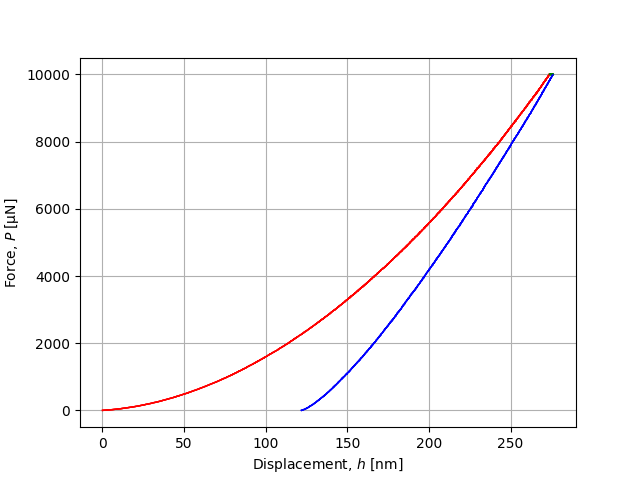

['ConicalLoadingStep', 'Step', 'UnloadingStep']


In [5]:
plot_reject = False
colors = "rgb"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
tests = batch.tests
Ntests = len(tests)
for Nt in range(Ntests):
    test = tests[Nt]
    if plot_reject == False and test.reject == False:
        test_data = test.data
        test_structure = [step.kind() for step in test.steps]
        for step_id, step_data in test_data.groupby("step"):
            ax.plot(
                step_data.disp * 1.0e9,
                step_data.force * 1.0e6,
                "-",
                lw=1.0,
                color=colors[step_id%len(colors)],
            )
            

ax.grid()
ax.set_xlabel("Displacement, $h$ [nm]")
ax.set_ylabel("Force, $P$ [µN]")
#plt.savefig("experimental_batch.png")
plt.show()

print(test_structure)

## Post-processing

In this section, we post-process our tests to extract basic data from the various steps. Indentoolbox can be used to collectively process one step of data from all trials and export the result as a dataframe. This is a powerful feature for batch processing, as is often the case with indentation.

First, we focus on the parabolic loading step:

In [9]:
loading_data = batch.collect_steps(0).parabolic_fit(displim = 50.e-9, htrunc = batch.tip.htrunc)
loading_data.index = loading_data.index.droplevel(1)

disp
[2.47687000e-10 5.78034000e-10 1.06362300e-09 ... 2.73674898e-07
 2.73919190e-07 2.73800641e-07]
force
[2.85234300e-06 3.96169300e-06 5.85004200e-06 ... 9.99864686e-03
 1.00000233e-02 9.99998574e-03]
compliance
0.0
disp
[2.47687000e-10 5.78034000e-10 1.06362300e-09 ... 2.73674898e-07
 2.73919190e-07 2.73800641e-07]
force
[2.85234300e-06 3.96169300e-06 5.85004200e-06 ... 9.99864686e-03
 1.00000233e-02 9.99998574e-03]
compliance
0.0
disp
[2.47687000e-10 5.78034000e-10 1.06362300e-09 ... 2.73674898e-07
 2.73919190e-07 2.73800641e-07]
force
[2.85234300e-06 3.96169300e-06 5.85004200e-06 ... 9.99864686e-03
 1.00000233e-02 9.99998574e-03]
compliance
0.0
disp
[2.47687000e-10 5.78034000e-10 1.06362300e-09 ... 2.73674898e-07
 2.73919190e-07 2.73800641e-07]
force
[2.85234300e-06 3.96169300e-06 5.85004200e-06 ... 9.99864686e-03
 1.00000233e-02 9.99998574e-03]
compliance
0.0
disp
[2.47687000e-10 5.78034000e-10 1.06362300e-09 ... 2.73674898e-07
 2.73919190e-07 2.73800641e-07]
force
[2.85234300e

We then turn our attention to the unloading step:

In [7]:
unloading_data = batch.collect_steps(2).unloading_fit()
unloading_data.index = unloading_data.index.droplevel(1)
print(unloading_data)

disp
[2.75980050e-07 2.75998558e-07 2.75822810e-07 ... 1.22630415e-07
 1.22184160e-07 1.22028458e-07]
force
[9.99290871e-03 9.98795115e-03 9.98294630e-03 ... 1.23499600e-05
 7.55594400e-06 4.05986400e-06]
compliance
0.0
disp
[2.75980050e-07 2.75998558e-07 2.75822810e-07 ... 1.22630415e-07
 1.22184160e-07 1.22028458e-07]
force
[9.99290871e-03 9.98795115e-03 9.98294630e-03 ... 1.23499600e-05
 7.55594400e-06 4.05986400e-06]
compliance
0.0
disp
[2.75980050e-07 2.75998558e-07 2.75822810e-07 ... 1.22630415e-07
 1.22184160e-07 1.22028458e-07]
force
[9.99290871e-03 9.98795115e-03 9.98294630e-03 ... 1.23499600e-05
 7.55594400e-06 4.05986400e-06]
compliance
0.0
disp
[2.75980050e-07 2.75998558e-07 2.75822810e-07 ... 1.22630415e-07
 1.22184160e-07 1.22028458e-07]
force
[9.99290871e-03 9.98795115e-03 9.98294630e-03 ... 1.23499600e-05
 7.55594400e-06 4.05986400e-06]
compliance
0.0
disp
[2.75980050e-07 2.75998558e-07 2.75822810e-07 ... 1.22630415e-07
 1.22184160e-07 1.22028458e-07]
force
[9.99290871e

And we apply the method of Oliver and Pharr to deduce the indentation modulus and then the Young's modulus.

In [8]:
OP = itb.processing.OliverPharr(data = unloading_data, tip = batch.tip)
print(OP)

               h           P           S          hc          Ac         Eeq  \
test                                                                           
0    2.75999e-07 9.99291e-03 8.30752e+04 1.89392e-07 1.02373e-12 6.99666e+10   
1    2.75999e-07 9.99291e-03 8.30752e+04 1.89392e-07 1.02373e-12 6.99666e+10   
2    2.75999e-07 9.99291e-03 8.30752e+04 1.89392e-07 1.02373e-12 6.99666e+10   
3    2.75999e-07 9.99291e-03 8.30752e+04 1.89392e-07 1.02373e-12 6.99666e+10   

         Eeqsamp  
test              
0    7.44420e+10  
1    7.44420e+10  
2    7.44420e+10  
3    7.44420e+10  


In [ ]:
nu_samp = 0.17

In [ ]:
OP["Esamp"] = OP.Eeqsamp * (1. - nu_samp**2)
print(OP)

## Reverse analysis

In this section, we use several inverse analysis algorithms to retrieve the mechanical properties of the material under study. As this material is fused quartz, these methods are unsuitable for crystalline metals. See it as a demonstration, but disregard the results.

In [ ]:
test_id = 0
C = loading_data.loc[test_id, "C"]
S = unloading_data.loc[test_id, "S"]
hm = unloading_data.loc[test_id, "hm"]
Pm = loading_data.loc[test_id, "Pm"]
hf = unloading_data.loc[test_id, "hf"]
E_ind = batch.tip.young_modulus
nu_ind = batch.tip.poisson_coefficient
Wrev = unloading_data.loc[test_id, "W"]
Wtot = loading_data.loc[test_id, "W"]
Wirr = Wtot + Wrev
Wfrac = Wirr/Wtot
#Wfrac = 0.9

In [ ]:
gian99 = pd.DataFrame(itb.processing.GIAN99(hm = hm, hf = hf, S = S, C = C, nu = nu_samp, E_ind = E_ind, nu_ind = nu_ind))
print(gian99)

In [ ]:
dao01 = pd.DataFrame(itb.processing.DAO01(S=S,C=C,Pm=Pm,Wfrac=Wfrac,hm=hm,hf=hf))
print(dao01)

In [ ]:
casals05 = pd.DataFrame(itb.processing.CASA05(hm=hm, hf=hf, Pm=Pm, S=S, C=C))
print(casals05)